In [1]:
import os
os.chdir("../")
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx
import time
from numpy.linalg import eigvals, norm
import pickle

from graph_utils import *

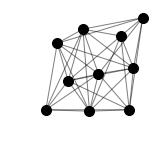

In [2]:
G = nx.gnp_random_graph(10,0.75)
p = draw_graph(G,fig_size=2)

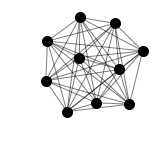

In [3]:
K = nx.complete_graph(len(G))
p=draw_graph(K,fig_size=2)

In [4]:
BK = nx.incidence_matrix(K, oriented=True).todense()
BK.shape

(10, 45)

In [17]:
np.kron(BK,np.eye(2)).shape

(20, 90)

In [18]:
np.eye(1)

array([[1.]])

(0, 5)

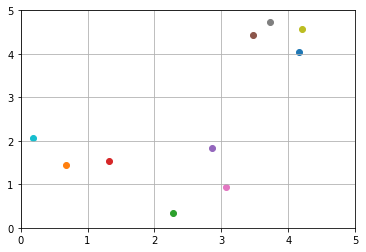

In [19]:
x_max = y_max = 5
positions = np.zeros((len(G)*2))
velocities = np.zeros((len(G)*2))
i=0
while(i<len(G)*2):
    positions[i],positions[i+1] = y_max*np.random.rand(2)
    i= i+2
    
i=0
while(i<len(G)*2):
    velocities[i],velocities[i+1] = 5*np.random.rand(2)
    i= i+2
    
i=0
while i < len(G)*2:
    plt.scatter(positions[i],positions[i+1])
    i = i+2
plt.grid()
plt.xlim(0,x_max)
plt.ylim(0,y_max)

In [20]:
positions = positions.reshape(1,20)
velocities = velocities.reshape(1,20)
positions.shape

(1, 20)

In [17]:
def S_graph_pos(positions,R=3):
    S = nx.Graph()
    if (positions.shape[1] != 2): 
        size = (int(positions.shape[1]/2),2)
    else:
        size = positions.shape
    for i,r1 in enumerate(positions.reshape(size)):
        for j,r2 in enumerate(positions.reshape(size)):
            if (sum(r1 == r2) < 2 and norm(r1-r2)<R):
                S.add_edge(i,j)
            else:
                S.add_node(i)
    return S

In [18]:
def S_graph_rel(re,n,R=3):
    S = nx.Graph()
    size = (int(re.shape[1]/2),2)
    for i in range(0,n):
        S.add_node(i)
    j=-1
    for i, x in enumerate(re.reshape(size)):
        if (i % 9 == 0):
            j=j+1
        if (norm(x)<R):
            print(j)
            S.add_edge(j,i%9)
            
    return S

In [19]:
R.reshape((45,2))

NameError: name 'R' is not defined

In [20]:
S = S_graph_pos(positions,3)
            
p=draw_graph(S,fig_size=4, labels=True)

IndexError: tuple index out of range

In [21]:
re = np.dot(positions,np.kron(BK,np.eye(2)))

NameError: name 'BK' is not defined

In [22]:
p=re.reshape((45,2))
s = S_graph_rel(re,10,100)
q = draw_graph(s,labels=True)
len(s)

NameError: name 're' is not defined

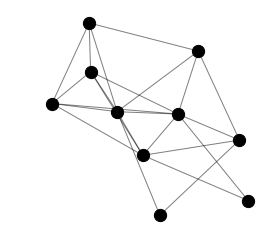

In [23]:
p

In [24]:
norm(p[9])

TypeError: 'Figure' object does not support indexing

In [25]:
np.array([0.010596,1.9689])-np.array([])

ValueError: operands could not be broadcast together with shapes (2,) (0,) 

In [26]:
def stack(v):
    if v.shape != (len(v),2):
        print("Wrong shape need (any,2)")
        return -1
    ret = np.zeros(2*len(v))
    j=0
    for i in range(0,len(v)):
        ret[j] = v[i,0]
        ret[j+1] = v[i,1]
        j = j+2
    return ret

def unstack(v):
    ret = np.zeros((int((len(v)/2)),2))
    i=0
    j=0
    while i < len(v):
        ret[j,0] = v[i]
        ret[j,1] = v[i+1]
        i = i+2
        j = j+1
    return ret

def v_dot(v, r, v_graph, s_graph, R):
    def grad_V(r1,r2,R=3):
        r = norm(r1-r2)
        if (r < 0 ):
            return float('inf')
        if(r<R):
            return (r1-r2)*(-2**R**2)/(r**4)
        else:
            return (r1-r2)/(r*R)
    #v = v.reshape((len(v_graph),2))
    v_dot = np.zeros((len(v_graph),2))
    dv = 0
    for i in range(0,len(v_graph)):
        for j in nx.neighbors(v_graph,i):
            if (j != i):
                dv = dv + (v[i]-v[j])
        dV = 0
        for k in range(0,len(v_graph)):
            for l in nx.neighbors(s_graph,k):
                if (l != k):
                    dV = dV + grad_V(r[k],r[l],R=R)
        v_dot[i] = v_dot[i] - dv - dV
    return v_dot
    #return v_dot.reshape((1,2*len(v)))

def r_dot(v):
    return v

def V(r1,r2, R=3):
    r = norm(r1-r2)
    if (r < 0):
        return float('inf')
    if(r < R):
        return (R**2)/(r**2)
    else:
        return r/R

def grad_V(r1,r2,R=3):
    r = norm(r1-r2)
    if (r < 0 ):
        return float('inf')
    if(r<R):
        return (r1-r2)*(-2**R**2)/(r**4)
    else:
        return (r1-r2)/(r*R)

In [27]:
positions

array([1.86277621, 4.50517991, 3.0256721 , 2.98584083, 2.26239582,
       1.67842316, 3.06097897, 0.75265869, 2.87150535, 2.85682365,
       1.26778408, 0.76356749, 1.28746249, 1.07255493, 3.70873353,
       1.44973937, 2.85427538, 1.00121721, 0.21380374, 0.92883303])

In [28]:
G = nx.watts_strogatz_graph(10,3,0.2)

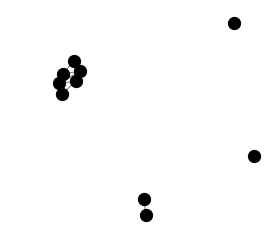

In [40]:
x_max = y_max = 5
positions = np.zeros((len(G)*2))
velocities = np.zeros((len(G)*2))
i=0
while(i<len(G)*2):
    positions[i],positions[i+1] = y_max*np.random.rand(2)
    i= i+2
    
i=0
while(i<len(G)*2):
    velocities[i],velocities[i+1] = 8*np.random.rand(2)
    if (np.random.rand(1)<0.5):
        velocities[i] = -1*velocities[i]
    if(np.random.rand(1)<0.5):
        velocities[i+1] = -1*velocities[i+1]
    i= i+2
    
d = 2
S = S_graph_pos(positions.reshape((10,2)),d)

G = nx.gnp_random_graph(10,0.75)

T = 10
dt=0.01
t=0

v_graph = G
s_graph = S
r = positions.reshape((10,2))
v = velocities.reshape((10,2))

p = draw_graph(S,fig_size=4)

In [41]:
v

array([[ 3.36434289, -6.86030105],
       [-2.15012405, -6.5402777 ],
       [-6.89352289,  6.22169999],
       [ 7.42189013, -6.27044646],
       [-5.1752677 , -1.31364908],
       [ 4.42175841,  6.12394602],
       [-6.66450431,  2.2752497 ],
       [-5.69593437,  4.14855407],
       [-6.18882669,  0.25848929],
       [-4.64284464, -7.2279612 ]])

In [43]:
R = list()
V = list()
SG = list()
VG = list()

while t < T:
    u = v
    v = v + dt*v_dot(v,r,v_graph, s_graph, R=d)
    r = r+dt*r_dot(u)
    s_graph = S_graph_pos(r, R=d)
    v_graph = S_graph_pos(r,R=d)
    R.append(r)
    V.append(v)
    SG.append(s_graph)
    VG.append(v_graph)
    t = t+dt

In [44]:
V[-1]

array([[ -4.07406844,  -6.49552346],
       [ -9.49523086,  -5.74686403],
       [-13.7783547 ,   6.36072881],
       [ -4.07417735,  -6.49554766],
       [-18.74443195,  -1.37418826],
       [-11.67467698,   2.78666751],
       [-20.27471588,  -1.3489866 ],
       [-13.52142093,  -4.46875725],
       [-10.87195243,  -7.85486395],
       [ -4.64284464,  -7.2279612 ]])

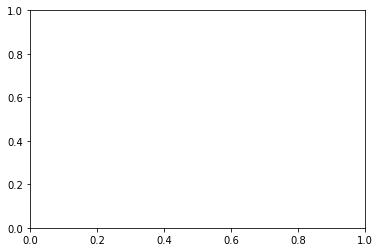

In [48]:
for i in range(0,100):
    f = update_frame(V,R,SG,VG,i)
    f.savefig('sim_pic/'+str(i)+'.png')
    plt.cla()

In [47]:
def update_frame(V,R,SG,VG,i):
    fig = plt.figure(1)
    norms = np.zeros(V[i].shape[0])
    unit = np.zeros(V[i].shape)
    for j in range(0,V[i].shape[0]):
        norms[j] = norm(V[i][j])
        unit[j] = V[i][j]/norms[j]
    rel = np.zeros(V[i].shape)
    for j in range(0,V[i].shape[0]):
        rel[j] = unit[j]*(norm(V[i][j])/max(norms))

    for j in range(0,10):
        plt.arrow(R[i][j,0],R[i][j,1],rel[j,0],rel[j,1],
                  width=.1,
                  edgecolor='green',
                  facecolor='green')


    nx.draw_networkx(SG[i], pos=R[i], edge_color='black', width=2.5, node_size=25, with_labels=False)
    nx.draw_networkx(VG[i], pos=R[i], edge_color='blue', width=0.5, node_size=25, with_labels=False)


    plt.xlim(plt.xlim()[0]-np.abs(unit[0,0]),plt.xlim()[1]+np.abs(unit[0,0]))
    plt.ylim(plt.ylim()[0]-np.abs(unit[0,1]), plt.ylim()[1]+np.abs(unit[0,1]))
    
    speed = np.zeros(V[i].shape[0])
    for j in range(0,V[i].shape[0]):
        speed[j] = norm(V[i][j])
    
    plt.title("Mean speed: {0} u/s \n Simulation Time {1} s".format(np.round(np.mean(speed),2), i*dt))

    return fig

In [42]:
imageio.mimwrite

AttributeError: 'function' object has no attribute 'help'

In [49]:
import imageio
import os
ids = list()
for i in range(0,100):
    ids.append('sim_pic/'+str(i)+'.png')

images = []
for i in ids:
    images.append(imageio.imread(i))
imageio.mimsave('../Data/v_graph_by_distance.gif', images, 'GIF', duration=0.05)

In [161]:
import matplotlib.animation as animation

fig = plt.figure()

ims = []
for i in range(0,100):
    if (i % 10 == 0):
        unit = np.zeros(V[i].shape)
        for j in range(0,len(V[i])):
            unit[j] = V[i][j]/norm(V[i][j])

        for j in range(0,10):
            plt.arrow(R[i][j,0],R[i][j,1],unit[j,0],unit[j,1],
                      width=.1,
                      edgecolor='green',
                      facecolor='green')


        nx.draw_networkx(SG[i], pos=R[i], edge_color='r', width=5)
        nx.draw_networkx(VG, pos=R[i], edge_color='black', width=2.5)


        plt.xlim(plt.xlim()[0]-unit[0,0],plt.xlim()[1]+unit[0,0])
        plt.ylim(plt.ylim()[0]-unit[0,1], plt.ylim()[1]+unit[0,1])

        fig.canvas.draw()
        X = np.array(fig.canvas.renderer._renderer)
        im = plt.imshow(X)
        ims.append([im])
        plt.cla()


ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=1000)


from matplotlib.animation import FFMpegWriter
writer = FFMpegWriter(fps=15, metadata=dict(artist='Me'), bitrate=1800)
ani.save("movie.mp4", writer=writer)

<Figure size 432x288 with 0 Axes>

In [76]:
image.reshape((width,height,3))

TypeError: 'numpy.float64' object cannot be interpreted as an integer

IndexError: index 10 is out of bounds for axis 0 with size 10

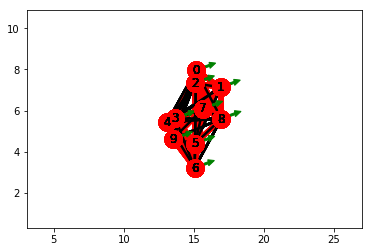

In [176]:
unit = np.zeros(v.shape)
for i in range(0,len(v)):
    unit[i] = v[i]/norm(v[i])


for i in range(0,10):
    plt.arrow(r[i,0],r[i,1],unit[i,0],unit[i,1],
              width=.1,
              edgecolor='green',
              facecolor='green')
    

    nx.draw_networkx(s_graph, pos=r, edge_color='r', width=5)
    nx.draw_networkx(v_graph, pos=r, edge_color='black', width=2.5)

    plt.xlim(plt.xlim()[0]-unit[0,0],plt.xlim()[1]+unit[0,0])
    plt.ylim(plt.ylim()[0]-unit[0,1], plt.ylim()[1]+unit[0,1])

In [773]:
r+unit

array([[11.6178834 , 16.82326793],
       [ 8.21081087, 20.97450117],
       [11.03134134, 18.07299392],
       [10.47557443, 19.50011206],
       [ 8.07940133, 17.86088501],
       [ 8.469207  , 18.87242446],
       [ 8.97656978, 16.57675374],
       [11.61233867, 19.19752416],
       [ 8.61166422, 16.53934395],
       [ 7.35830903, 20.54549009]])

In [735]:
positions.reshape(10,2)

array([[4.1713068 , 0.91813427],
       [0.97396728, 4.85186166],
       [3.72728247, 1.90933124],
       [3.15961453, 3.42721454],
       [0.76077245, 1.77322941],
       [1.18878545, 2.57583381],
       [1.4727141 , 0.64003011],
       [4.44526626, 3.06014689],
       [1.25423651, 0.49133175],
       [0.0385735 , 4.4077663 ]])

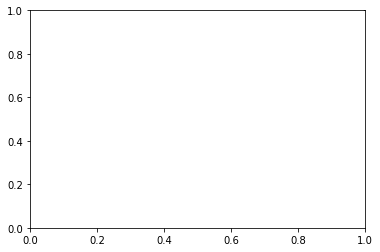

In [802]:
plt.arrow(1,1,2,2, width=.15,edgecolor=None, facecolor='black')

In [276]:
velocities

array([[0.9959915 , 0.78822563, 1.15127203, 1.12897428, 1.27558316,
        0.24665442, 0.86674908, 1.57417972, 0.54896427, 0.12964408,
        0.82305116, 1.42658465, 1.16794972, 1.51903638, 0.66539465,
        0.42100074, 1.40954961, 0.6916389 , 0.25997836, 1.17899304]])

In [277]:
unstack(v)

0


IndexError: index 0 is out of bounds for axis 0 with size 0

In [282]:
v

array([[0.9959915 , 0.78822563, 1.15127203, 1.12897428, 1.27558316,
        0.24665442, 0.86674908, 1.57417972, 0.54896427, 0.12964408,
        0.82305116, 1.42658465, 1.16794972, 1.51903638, 0.66539465,
        0.42100074, 1.40954961, 0.6916389 , 0.25997836, 1.17899304]])

In [295]:
G.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9))

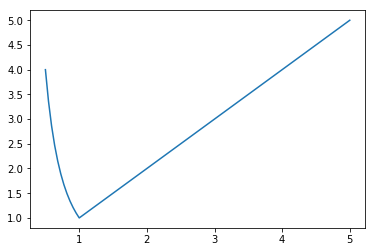

In [331]:
x = np.linspace(0.5,5,100)
y = np.zeros(len(x))
for i in range(0,len(x)):
    y[i] = V(x[i],0)
plt.plot(x,y)

In [326]:
norm(1-0)

1.0

In [838]:
unit[2], unit[1]

(array([0.41307351, 0.91069769]), array([0.41307351, 0.91069769]))

In [843]:
ref = np.angle(complex(unit[1,0],unit[1,1]))
f = True
tol=1e-6
for i in range(0,len(unit)):
    if (np.abs(ref - np.angle(complex(unit[i,0],unit[i,1])))>tol):
        f = False
print(f)
    

True


In [5]:
def velocity_angle_agreement(v,tol=1e-6):
    unit = np.zeros(v.shape)
    for i in range(0,len(v)):
        unit[i] = v[i]/norm(v[i])
    ref = np.angle(complex(unit[1,0],unit[1,1]))
    for i in range(0,len(unit)):
        if (np.abs(ref - np.angle(complex(unit[i,0],unit[i,1])))>tol):
            return False
    return True

In [1]:
import os
c = os.getcwd()
os.chdir("../")
from Flocking_2D_consensus import *
from graph_utils import *
os.chdir(c)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx
import time
from numpy.linalg import eigvals, norm
import pickle

def v_dot(v, r, v_graph, s_graph,R, *args):
    def grad_V(r1,r2,R=3):
        r = norm(r1-r2)
        if (r < 0 ):
            return float('inf')
        if(r<R):
            return (r1-r2)*(-2**R**2)/(r**4)
        else:
            return (r1-r2)/(r*R)
    #v = v.reshape((len(v_graph),2))
    v_dot = np.zeros((len(v_graph),2))
    dv = 0
    dV = 0
    for i in range(0,len(v_graph)):
        for j in nx.neighbors(v_graph,i):
            if (j != i):
                dv = dv + (v[i]-v[j])
        for k in range(0,len(v_graph)):
            for l in nx.neighbors(s_graph,k):
                if (l != k):
                    dV = dV + grad_V(r[k],r[l],R)
        v_dot[i] = v_dot[i] - dv - dV
        dv=0
        dV=0
    return v_dot
    #return v_dot.reshape((1,2*len(v)))

def r_dot(v, *args):
    return v

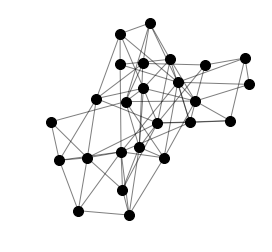

In [2]:
N=25
G = nx.gnp_random_graph(N,0.2)
#G = nx.watts_strogatz_graph(10,3,0.5)
p = draw_graph(G,fig_size=4)

In [54]:
V = np.random.rand(N,2)
V

array([[0.52979934, 0.42114257],
       [0.38141666, 0.80455066],
       [0.51606098, 0.5957153 ],
       [0.67479389, 0.36574106],
       [0.45277585, 0.38890568],
       [0.73325731, 0.99578633],
       [0.38535593, 0.42633576],
       [0.20773643, 0.18226489],
       [0.79181289, 0.99954746],
       [0.4849934 , 0.04194232],
       [0.26894902, 0.6868356 ],
       [0.84580581, 0.51339175],
       [0.25459969, 0.17282378],
       [0.43337051, 0.05318157],
       [0.39993085, 0.59161769],
       [0.44799947, 0.15970676],
       [0.1960845 , 0.83324634],
       [0.48700615, 0.76046216],
       [0.28812885, 0.54293374],
       [0.55182988, 0.17464644],
       [0.95463558, 0.81010924],
       [0.96006144, 0.32725263],
       [0.84640994, 0.55758232],
       [0.15247531, 0.33262515],
       [0.01841082, 0.96704613]])

In [25]:
FS = Flock_Simulation(G,r_dot,v_dot)

Argument Error: position_dynamics_args must be np.ndarray type
Argument Error: velocity_dynamics_args must be np.ndarray type


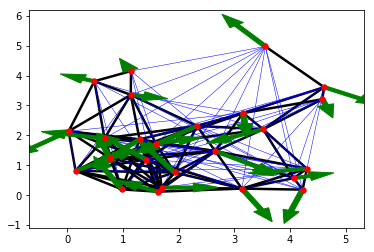

In [26]:
FS.plot()

In [27]:
FS.run_sim(save_data=True)

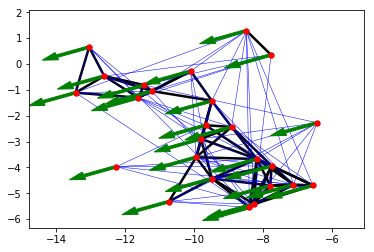

In [28]:
FS.plot()

In [29]:
t = FS.T_sim
V = np.zeros((len(FS.V_sim),FS.V_sim[0].shape[0]))
T = np.zeros((len(FS.V_sim),FS.V_sim[0].shape[0]))
for i in range(0,len(FS.V_sim)):
    for j in range(0,FS.V_sim[i].shape[0]):
        V[i,j] = np.linalg.norm(FS.V_sim[i][j,:])
        T[i,j] = np.angle(complex(FS.V_sim[i][j,0], FS.V_sim[i][j,1]))

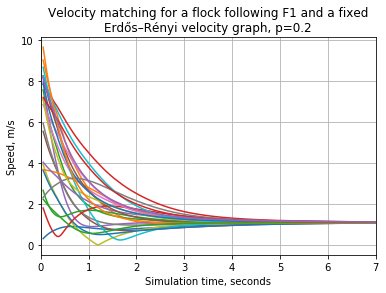

In [30]:
for i in range(0,V.shape[1]):
    plt.plot(t,V[:,i])
plt.grid()
plt.xlabel("Simulation time, seconds")
plt.ylabel("Speed, m/s")
plt.xlim(0,7)
plt.title("Velocity matching for a flock following F1 and a fixed\n"+
          "Erdős–Rényi velocity graph, p=0.2")
plt.savefig("velocity_f1_fixed",bbpx_inches='tight')

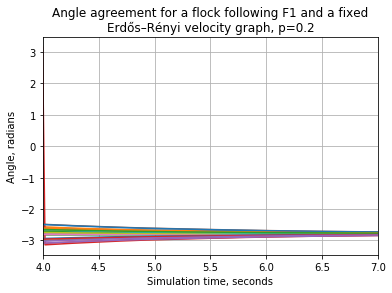

In [32]:
for i in range(0,V.shape[1]):
    plt.plot(t,T[:,i])
plt.grid()
plt.xlabel("Simulation time, seconds")
plt.ylabel("Angle, radians")
plt.xlim(4,7)
plt.title("Angle agreement for a flock following F1 and a fixed\n"+
          "Erdős–Rényi velocity graph, p=0.2")
plt.savefig("angle_f1_fixed",bbpx_inches='tight')

In [2]:
def sim_flock_er(n_probs,V,R,N=25):
    Time = np.zeros(n_probs)
    i=0
    t1 = time.time()
    for p in np.linspace(0.1,1,n_probs):
        ER = nx.gnp_random_graph(N, p, seed=None)
        while(not nx.is_connected(ER)):
            ER = nx.gnp_random_graph(N, p, seed=None)
    
        FS = Flock_Simulation(ER,
                              r_dot,
                              v_dot,
                              velocity_init=V,
                              position_init=R)
        FS.run_sim(save_data=True)

        Time[i] = FS.T_sim[-1]
        i=i+1
    print("Iteration done!")
    t2 =time.time()
    print("Iteration time: ",round(t2-t1,3), " seconds")
    return Time

def sim_flock_ws(n_probs,V,R,N=25, av_degree =6):
    Time = np.zeros(n_probs)
    i=0
    t1 = time.time()
    for p in np.linspace(0,1,n_probs):
        k = int(av_degree/2)
        GWS = nx.watts_strogatz_graph(N, k, p, seed=None)
        while(not nx.is_connected(GWS)):
            GWS = nx.watts_strogatz_graph(N, k, p, seed=None)

        FS = Flock_Simulation(GWS,
                              r_dot,
                              v_dot,
                              velocity_init=V,
                              position_init=R)
        FS.run_sim(save_data=True)

        Time[i] = FS.T_sim[-1]
        i=i+1
    print("Iteration done!")
    t2 =time.time()
    print("Iteration time: ",round(t2-t1,3), " seconds")
    return Time

In [3]:
N=10
V = np.random.rand(N,2)
R = 2*np.random.rand(N,2)

n=10
m=10
Time_er = np.zeros(n)
Time_ws = np.zeros(n)
for i in range(0,m):
    Time_er = Time_er + sim_flock_er(10, V,R, N=10)
    Time_ws = Time_ws + sim_flock_ws(10, V,R, N=10)
    
Time_er = Time_er/m
Time_ws = Time_ws/m

Iteration done!
Iteration time:  63.658  seconds
Iteration done!
Iteration time:  282.019  seconds
Iteration done!
Iteration time:  104.095  seconds
Iteration done!
Iteration time:  289.65  seconds
Iteration done!
Iteration time:  65.503  seconds
Iteration done!
Iteration time:  281.927  seconds
Iteration done!
Iteration time:  106.689  seconds
Iteration done!
Iteration time:  263.94  seconds
Iteration done!
Iteration time:  99.398  seconds
Iteration done!
Iteration time:  272.954  seconds
Iteration done!
Iteration time:  95.407  seconds
Iteration done!
Iteration time:  333.386  seconds
Iteration done!
Iteration time:  105.741  seconds
Iteration done!
Iteration time:  286.511  seconds
Iteration done!
Iteration time:  72.08  seconds
Iteration done!
Iteration time:  232.795  seconds
Iteration done!
Iteration time:  72.614  seconds
Iteration done!
Iteration time:  235.129  seconds
Iteration done!
Iteration time:  91.43  seconds
Iteration done!
Iteration time:  324.145  seconds


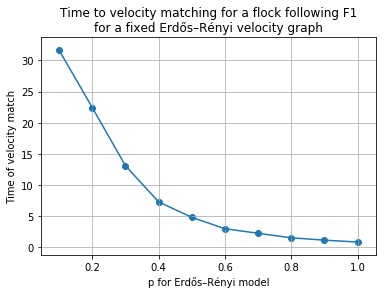

In [21]:
plt.plot(np.linspace(0.1,1,len(Time_er)),Time_er)
plt.scatter(np.linspace(0.1,1,len(Time_er)),Time_er)
plt.grid()
plt.title("Time to velocity matching for a flock following F1\n"
         +"for a fixed Erdős–Rényi velocity graph")
plt.xlabel("p for Erdős–Rényi model")
plt.ylabel("Time of velocity match")
plt.savefig("f1_er",bbpx_inches='tight')

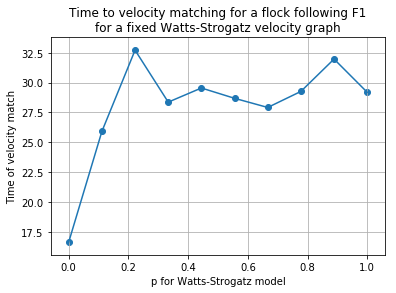

In [22]:
plt.plot(np.linspace(0,1,len(Time_ws)),Time_ws)
plt.scatter(np.linspace(0,1,len(Time_ws)),Time_ws)
plt.grid()
plt.title("Time to velocity matching for a flock following F1\n"
         +"for a fixed Watts-Strogatz velocity graph")
plt.xlabel("p for Watts-Strogatz model")
plt.ylabel("Time of velocity match")
plt.savefig("f1_ws",bbpx_inches='tight')